In [4]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

Loading: shapes_64x64_alpha_demo.npz
X shape: (25, 64, 64) y shape: (25,) dtype: uint8
Non-empty images: 25/25


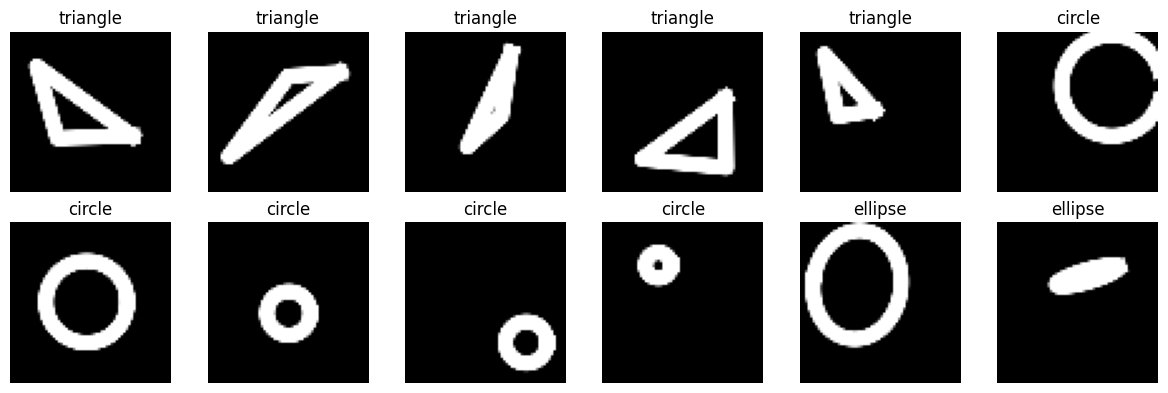

Saved 10023 preview PNGs in outline_previews/


In [ ]:
# Try to load the newest NPZ produced by the generator
# Prefer *_alpha.npz (alpha-based outlines); fallback to any *.npz
npz_paths = "shapes_64x64_alpha_demo.npz"
print("Loading:", npz_path)

# Load without pickle (labels are saved as fixed-width unicode)
data = np.load(npz_path,allow_pickle=True)
X, y = data["X"], data["y"]
print("X shape:", X.shape, "y shape:", y.shape, "dtype:", X.dtype)

# Identify non-empty (non-all-zero) images
non_empty = [i for i in range(len(X)) if np.any(X[i] > 0)]
print(f"Non-empty images: {len(non_empty)}/{len(X)}")
assert non_empty, "All images appear empty; check data generation or rendering path."

# Show up to 12 non-empty images
k = min(12, len(non_empty))
cols = 6
rows = (k + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(2*cols, 2*rows))
axes = np.atleast_1d(axes).ravel()

for ax in axes:
    ax.axis("off")

for ax, idx in zip(axes, non_empty[:k]):
    ax.imshow(X[idx], cmap="gray", vmin=0, vmax=255)
    ax.set_title(str(y[idx]))
    ax.axis("off")

plt.tight_layout()
plt.show()

# Save a few outlines to PNG for manual inspection
os.makedirs("outline_previews", exist_ok=True)
for i, idx in enumerate(non_empty):
    plt.imsave(os.path.join("outline_previews", f"img_{i}_{y[idx]}.png"), X[idx], cmap="gray", vmin=0, vmax=255)
print("Saved", len(os.listdir("outline_previews")), "preview PNGs in outline_previews/")